# Assignment-3 submitted by Sriramakrishna turaga 164010012

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.close('all')

def freestream_phi(V,z):
    complex_phi = V*z
    return complex_phi

def source_phi(strength,location,z):
    complex_phi = (strength/np.pi)*np.log(z - location)
    return complex_phi

def vortex_phi(strength,location,z):
    complex_phi = 1j*strength/(2*np.pi)*np.log((z-location)/location)
    return complex_phi

def create_mesh(x_low = -2, x_up = 2,n_x = 100,y_low = -2, y_up = 2,n_y = 100 ):
    "create_mesh(x_low, x_up, n_x, y_low, y_up, n_y) \
    Leave empty to use the default values"
    x = np.linspace(x_low,x_up,n_x)
    y = np.linspace(y_low,y_up,n_y)
    X,Y = np.meshgrid(x,y)
    z = X+1j*Y
    return z

def source_velocity(z, z_src, strength):
    vel = strength/(2*np.pi*(z - z_src))
    return vel.conjugate()

def vortex_velocity(z, z_vor, gamma):
    return (-1j*gamma/(2*np.pi*(z - z_vor))).conjugate()


def euler_integrate(z,z_src,strength,V, dt ,tf,sv_flag=1):
    result = [z]
    t=0.0
    while t<tf:
        vel = get_velocity(z,z_src,strength,V,sv_flag) 
        z += vel*dt
        result.append(z.copy())
        t += dt
    return np.asarray(result)

def rk2_integrate(z,z_src,strength,V, dt ,tf,sv_flag=1):
    result = [z]
    t = 0.0
    while t < tf:
        vel = get_velocity(z, z_src, strength, V,sv_flag)
        k1 = vel*dt
        z += k1
        vel = get_velocity(z, z_src, strength, V,sv_flag)
        k2 = vel*dt
        z += 0.5*(-k1 + k2) 
        result.append(z.copy()) 
        t += dt
    return np.asarray(result)

def get_velocity(z,z_src,strength,V,sv_flag):
    vel = np.zeros_like(z)
    if sv_flag:
        get_vel=source_velocity
    else:
        get_vel=vortex_velocity
    
    for i,z_i in enumerate(z):
        for j,z_j in enumerate(z_src):
            if z_i != z_j:
                vel[i] += get_vel(z_i,z_j,strength[j])              
    vel += V    
    return vel


def create_tracers(x_low = -2,x_up = -2.0, y_low = -2,y_up = 2,n = 10):
    if x_low == x_up:
        x = x_low*np.ones(n)
    else:
        x =np.linspace(x_low,x_up,n)
    y = np.linspace(y_low,y_up,n) 
    z = x +1j*y
    return z



## Problem-1
Consider the flow induced by a free stream with the velocity at infinity (1,0) with one source of strength unity at x,y=(-1,0) and another with strength -1 at x,y=(1,0).

    Plot the streamlines and potential lines using the complex potential generated by this. (1)

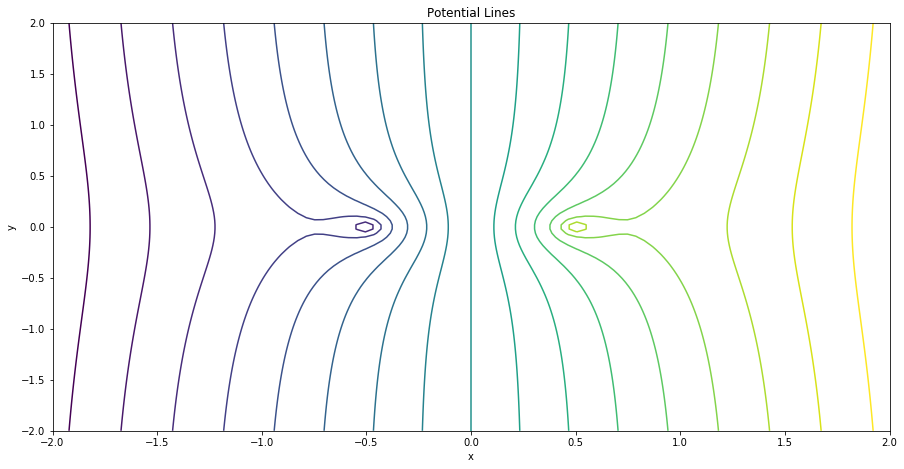

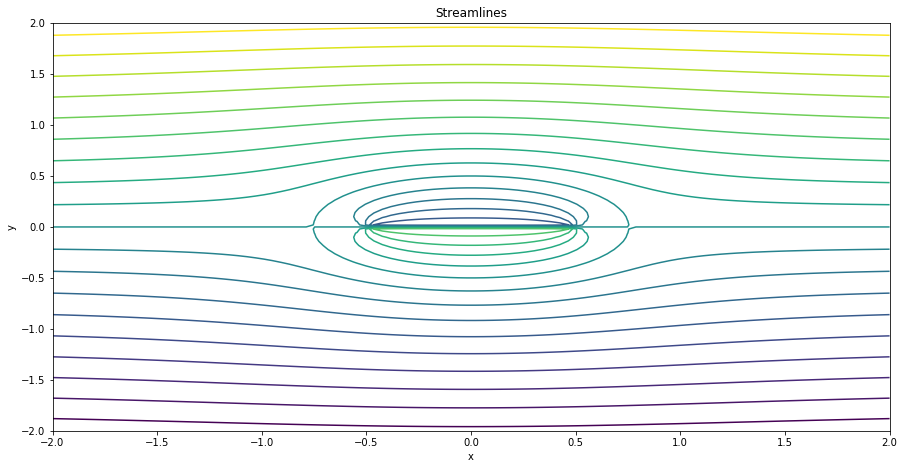

In [3]:

'''
Problem-1
'''

V = complex(1,0)
location1 = complex(-0.5,0)
strength1 = 1
location2 = complex(0.5,0)
strength2 = -1

z = create_mesh()

complex_phi = freestream_phi(V,z) + source_phi(strength1,location1,z)\
+ source_phi(strength2,location2,z)
    
'''Plotting for result for problem-1'''

plt.figure(figsize=(15,4.0/8.0*15))
plt.contour(z.real,z.imag,complex_phi.real,20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Potential Lines")
plt.figure(figsize=(15,4.0/8.0*15))
plt.contour(z.real,z.imag,complex_phi.imag,20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Streamlines")



## Problem-2
Now consider a set of tracer points starting at x=-2 (consider a line with say 10 points between y=-2 to 2).  Find the trajectory of these tracer points by integrating them given the velocity of the points.  Use both an Euler integrator and a Runge-Kutta second order to study the results. (2)

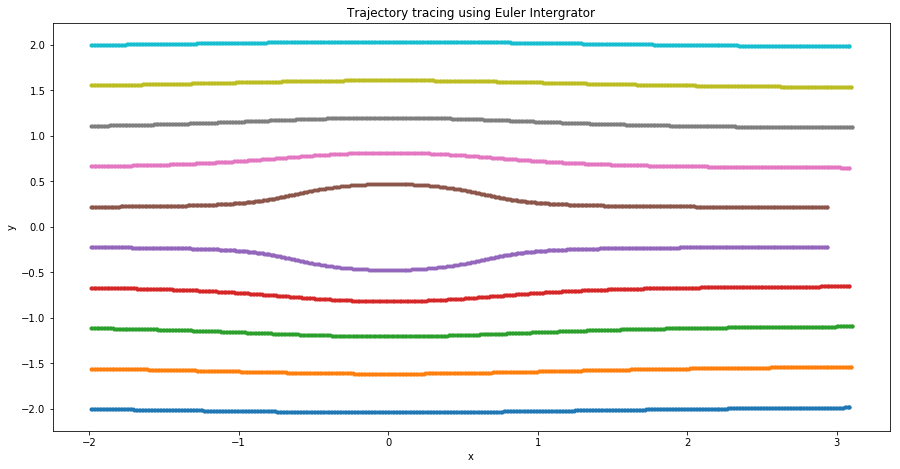

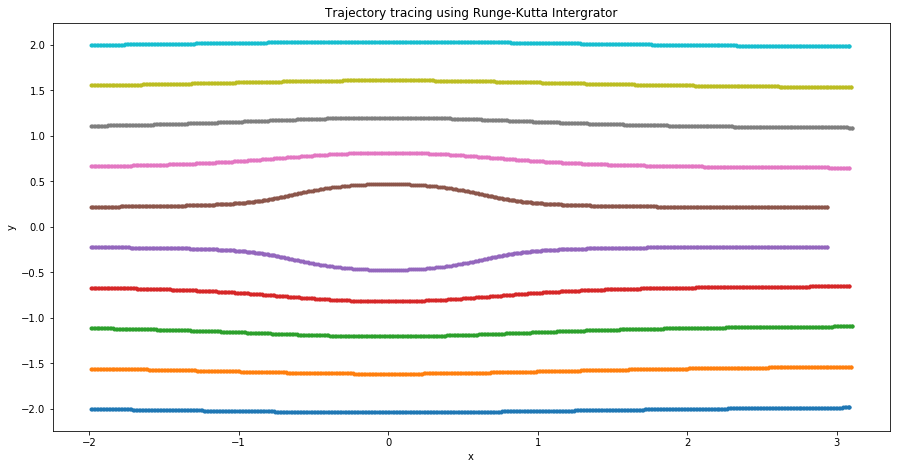

In [4]:

'''
Problem-2-Tracer points with sorce sink in freestream
'''

V = complex(1,0)
z_src = np.asarray([complex(-0.5,0),complex(0.5,0)])
z = create_tracers()
strength=np.asarray([1,-1])
dt = 0.01
tf = 5.0 
V = complex(1,0)

result_eul = euler_integrate(z.copy(),z_src,strength,V,dt,tf,sv_flag=1)
result_rk2 = rk2_integrate(z.copy(),z_src,strength,V,dt,tf,sv_flag=1)

'''Plotting for result for problem-2'''
plt.figure(figsize=(15,4.0/8.0*15))
plt.plot(result_eul.real,result_eul.imag,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Trajectory tracing using Euler Intergrator")
plt.figure(figsize=(15,4.0/8.0*15))
plt.plot(result_rk2.real,result_rk2.imag,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Trajectory tracing using Runge-Kutta Intergrator")



## Problem-3(a)


Consider two point vortices of equal strength (with value 1) placed one unit apart. Calculate their motion using a first order Euler scheme and Runge-Kutta second order scheme. Ensure that you pick a small enough time step to obtain about 3 significant places of accuracy. Also simulate this for a total time that allows the vortices to complete three rotations. As discussed in class, show that your RK2 implementation is indeed, second order accurate. Recall that you know the exact solution for this problem. (3)

(array([ 0.88337833,  0.88337833]), array([ 2.9606673,  2.9606673]))


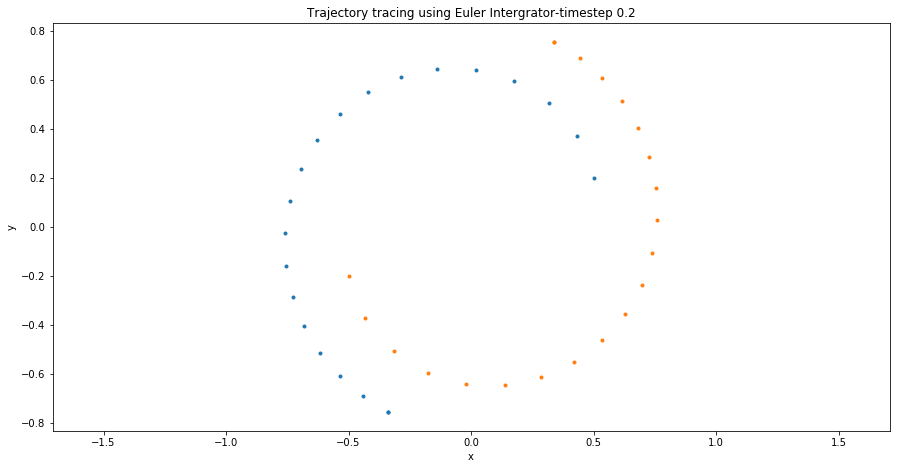

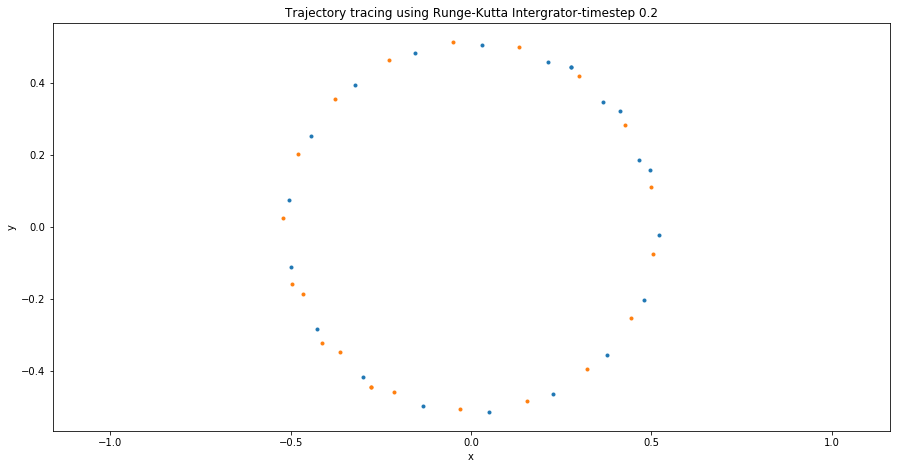

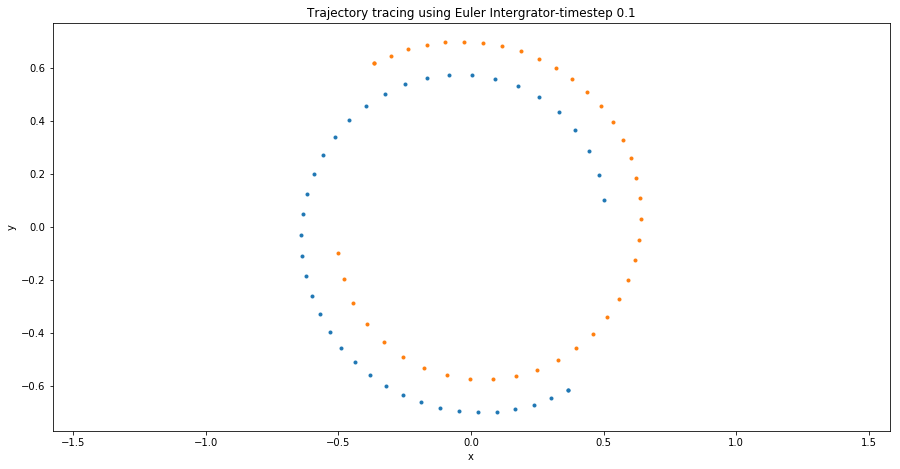

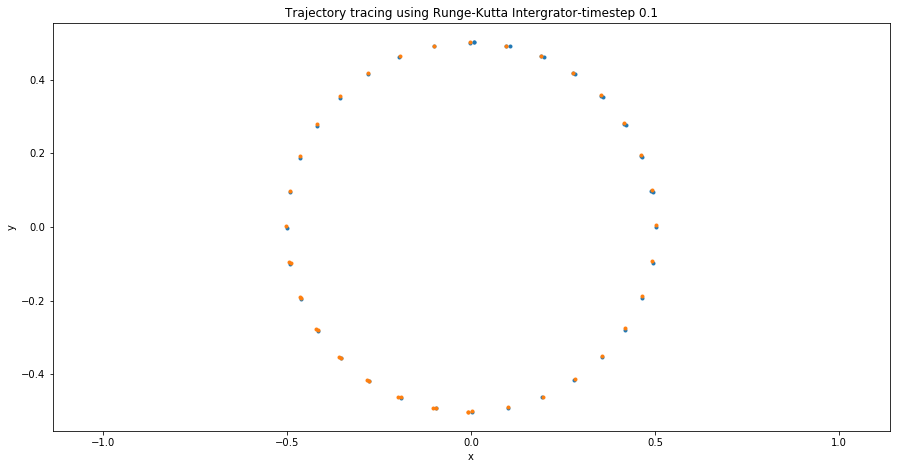

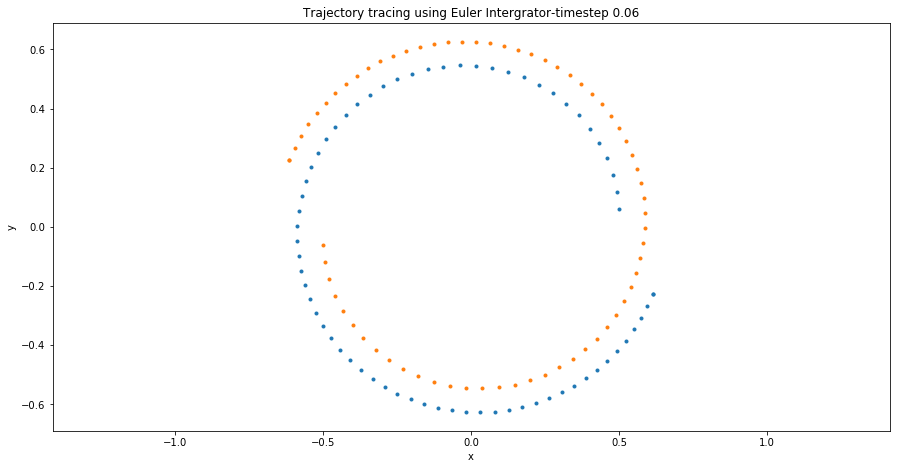

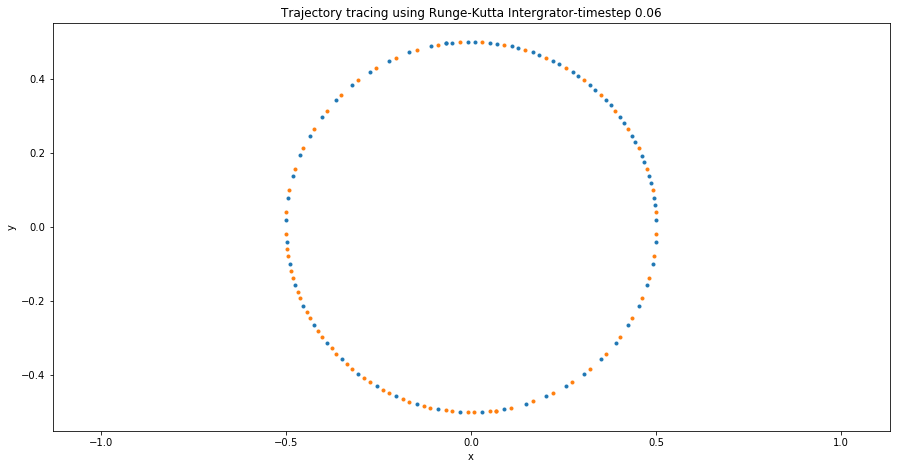

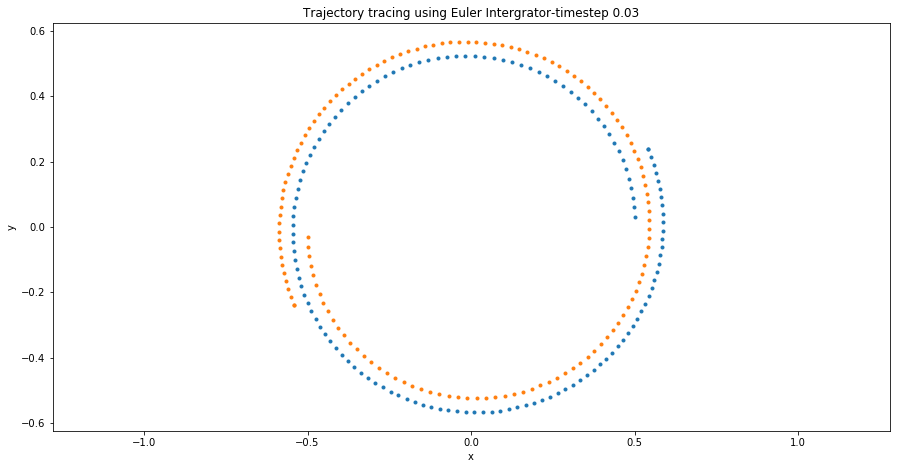

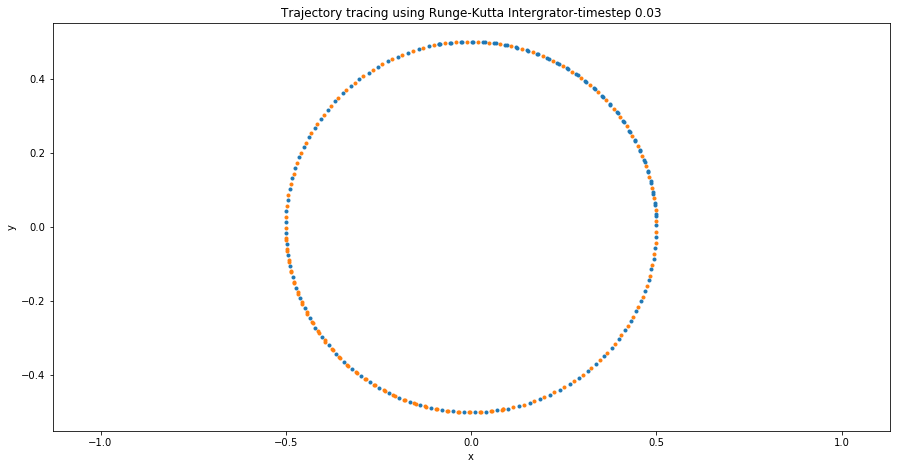

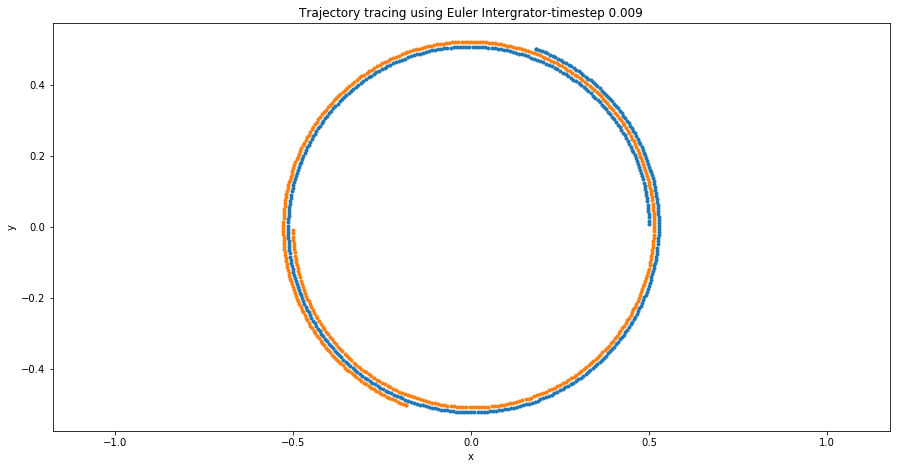

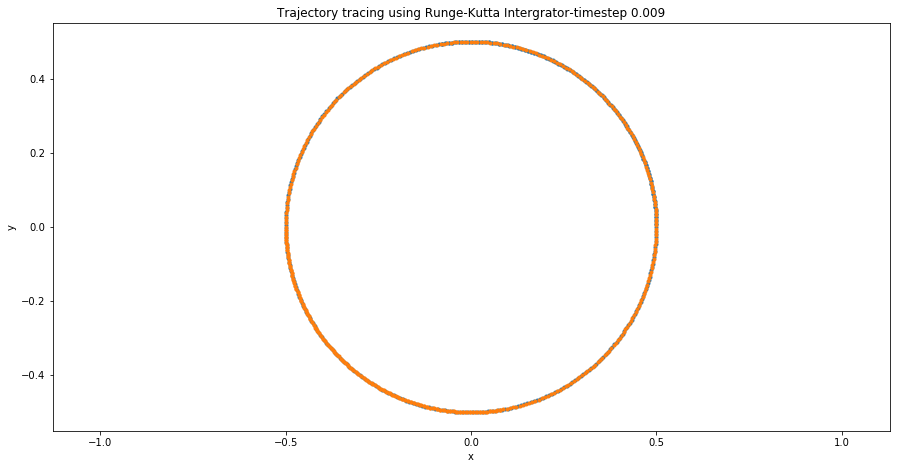

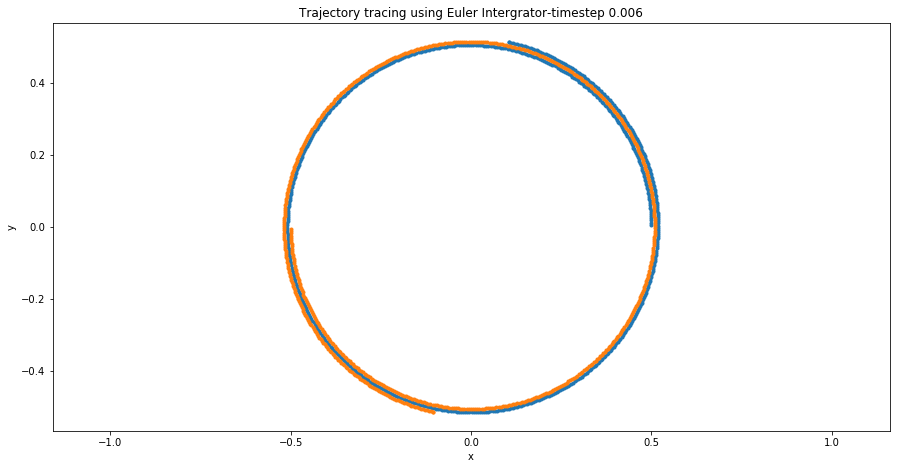

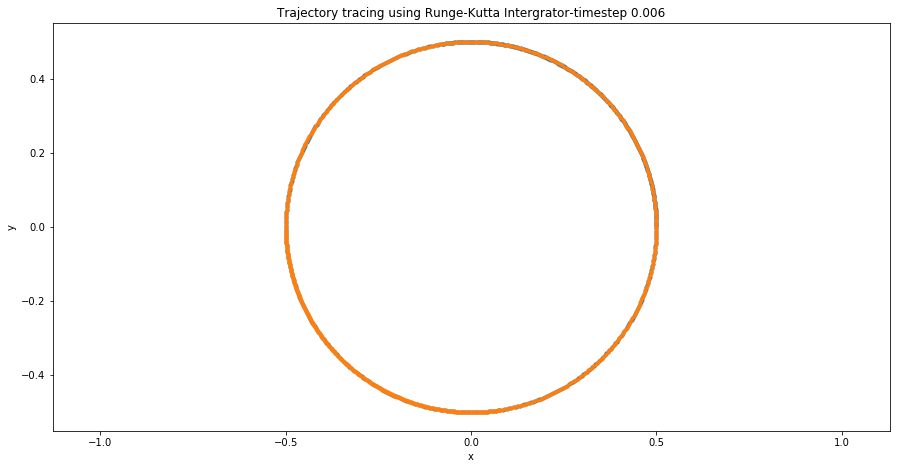

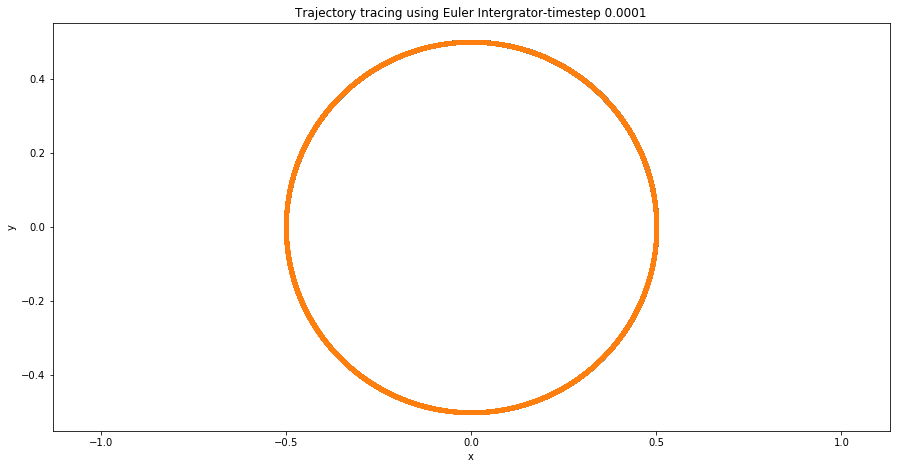

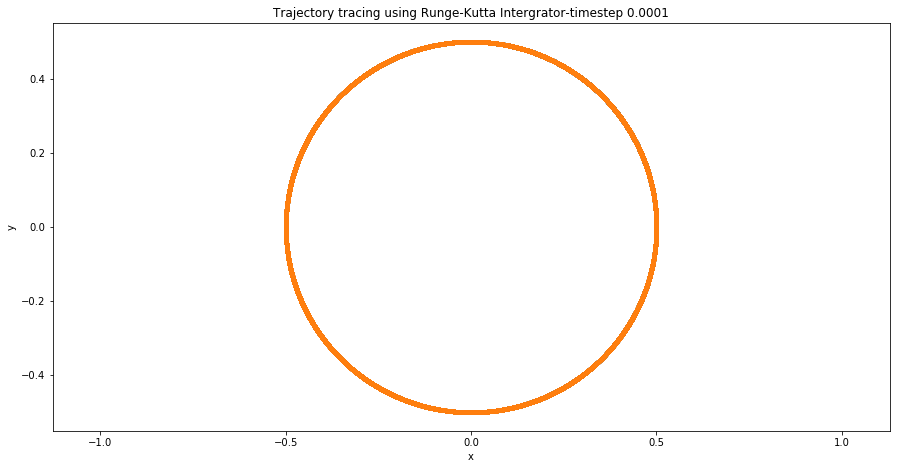

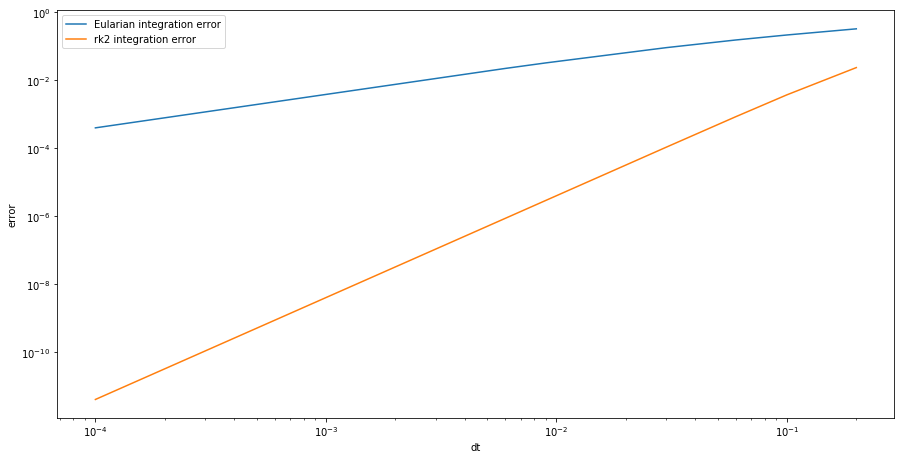

In [5]:

'''Problem-3'''

plt.close('all')
vor_z = np.asarray([complex(0.5, 0), complex(-0.5, 0)])
gamma = np.asarray([2*np.pi, 2*np.pi])
V= complex(0,0)
err_eu,err_rk2=[],[]
dT=[0.2,0.1,0.06,0.03, 0.009,0.006,0.0001]# 0.2,0.1,0.06,0.03]
# dT=[0.2]
for i in range(len(dT)):
    
    dt = dT[i]
    tf = 4.0 
    a= vor_z.copy()
    b= vor_z.copy()

    result_eul = euler_integrate(a, a, gamma, V,  dt, tf,sv_flag=0)
    result_rk2 = rk2_integrate(b,b, gamma, V,  dt, tf,sv_flag=0)

    err_eu.append(abs(np.absolute(result_eul[-1])-0.5))
    err_rk2.append(abs(np.absolute(result_rk2[-1])-0.5))
    
    

    '''Plotting for result for problem-3'''
    plt.figure(figsize=(15,4.0/8.0*15))
    plt.plot(result_eul.real,result_eul.imag,'.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    plt.title("Trajectory tracing using Euler Intergrator-timestep %s"%dt)
    plt.figure(figsize=(15,4.0/8.0*15))
    plt.plot(result_rk2.real,result_rk2.imag,'.')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    plt.title("Trajectory tracing using Runge-Kutta Intergrator-timestep %s"%dt)
    

err_eu=np.array(err_eu)
err_rk2=np.array(err_rk2)


plt.figure(figsize=(15,4.0/8.0*15))
plt.loglog(dT,err_eu[:,1],label='Eularian integration error')
plt.loglog(dT,err_rk2[:,1],label='rk2 integration error')
plt.xlabel('dt')
plt.ylabel('error')
# plt.axis('equal')
plt.legend()

# el_slope=(err_eu[1][0]-err_eu[1][-1])/(dT[0]-dT[-1])
# rk2_slope=(err_rk2[1][0]-err_rk2[1][-1])/(dT[0]-dT[-1])

el_slope=(np.log(err_eu[0])-np.log(err_eu[-1]))/(np.log(dT[0])-np.log(dT[-1]))
rk2_slope=(np.log(err_rk2[0])-np.log(err_rk2[-1]))/(np.log(dT[0])-np.log(dT[-1]))

print(el_slope,rk2_slope)


From the above figures of error comparision the slope of Eular integration step is {{el_slope[0]}} where as RK2 step it is {{rk2_slope[0]}} so it can be said that rk2 integration is 2nd order accurate.


## Problem-3(b)
Having done this, consider the motion of a set of passive tracer particles (say 10) initially placed on a straight line segment of length 2 units starting at the origin bisecting the line joining the two vortices. Show their path using the Runge-Kutta 2nd order scheme. (1)

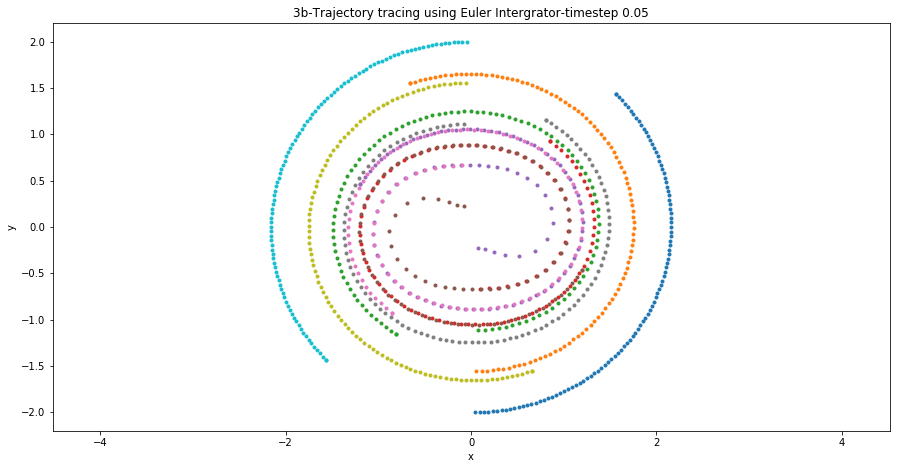

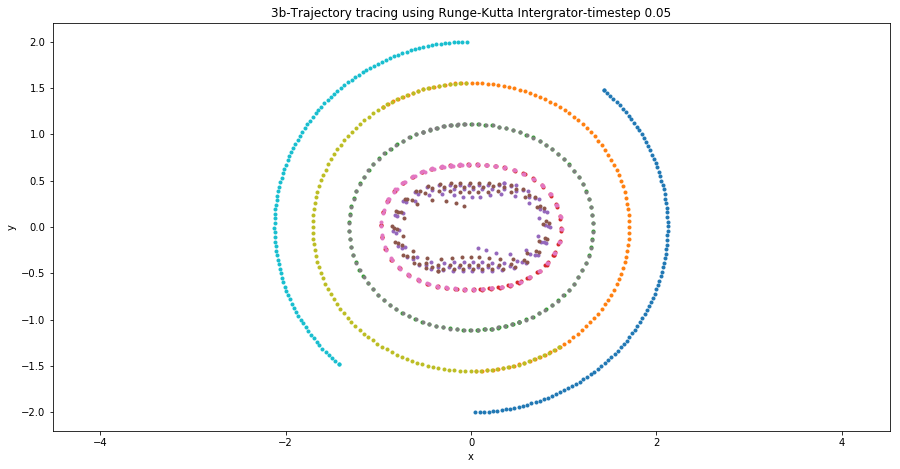

In [6]:

'''Problem-3b --Tracers in the center'''
vor_z = np.asarray([complex(0.5, 0), complex(-0.5, 0)])
gamma = np.asarray([2*np.pi, 2*np.pi])
V= complex(0,0)
# dT=[0.2,0.1,0.06,0.03,0.009,0.006,0.001]
# for i in range(len(dT)):
    
dt = 0.05
tf = 5.0 
a= vor_z.copy()
b= vor_z.copy()

z=create_tracers(x_low = 0.0,x_up=0.0,y_low = -2,y_up = 2,n = 10)

result_eul = euler_integrate(z.copy(), a, gamma, V,  dt, tf,sv_flag=0)
result_rk2 = rk2_integrate(z.copy(),b, gamma, V,  dt, tf,sv_flag=0)

# actual(a,a,gamma,V,dt,tf,sv_flag)


'''Plotting for result for problem-3b'''
plt.figure(figsize=(15,4.0/8.0*15))
plt.plot(result_eul.real,result_eul.imag,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title("3b-Trajectory tracing using Euler Intergrator-timestep %s"%dt)
plt.figure(figsize=(15,4.0/8.0*15))
plt.plot(result_rk2.real,result_rk2.imag,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title("3b-Trajectory tracing using Runge-Kutta Intergrator-timestep %s"%dt)


## Problem-3(c)

Now, find the path of three vortices of unit strength placed on a triangle with vertices (-0.5,0), (0.5, 0), (0, 0.5). Trace the path of tracers placed along a 45 degree line to the x-axis. You can also change the location of the vortices and show their paths. (1)

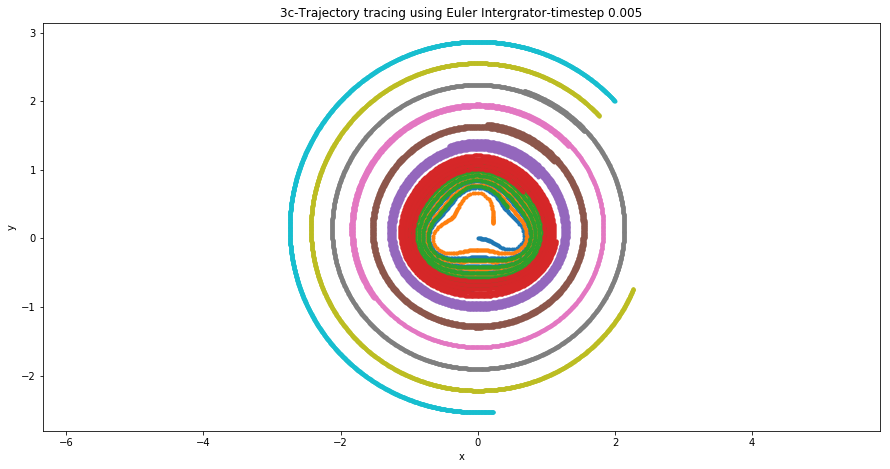

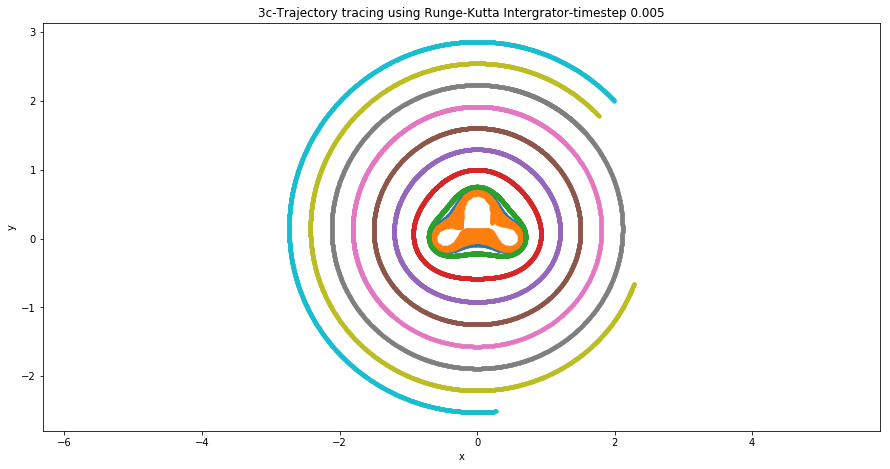

In [7]:
'''Problem-3c --3 vortices of equal strength'''
vor_z = np.asarray([complex(0.5, 0), complex(-0.5, 0), complex(0,0.5)])
gamma = np.asarray([2*np.pi, 2*np.pi, 2*np.pi])
V= complex(0,0)
# dT=[0.2,0.1,0.06,0.03,0.009,0.006,0.001]
# for i in range(len(dT)):
    
dt = 0.005
tf = 10.0 
a= vor_z.copy()
b= vor_z.copy()

z=create_tracers(x_low=0, x_up=2.0, y_low=0.0, y_up = 2.0, n=10)


result_eul = euler_integrate(z.copy(), a, gamma, V,  dt, tf,sv_flag=0)
result_rk2 = rk2_integrate(z.copy(),b, gamma, V,  dt, tf,sv_flag=0)

# actual(a,a,gamma,V,dt,tf,sv_flag)


'''Plotting for result for problem-3c'''
plt.figure(figsize=(15,4.0/8.0*15))
plt.plot(result_eul.real,result_eul.imag,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title("3c-Trajectory tracing using Euler Intergrator-timestep %s"%dt)
plt.figure(figsize=(15,4.0/8.0*15))
plt.plot(result_rk2.real,result_rk2.imag,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.title("3c-Trajectory tracing using Runge-Kutta Intergrator-timestep %s"%dt)



## Problem 4
Just for kicks, take 4 point vortices placed at arbitrary locations and with unit strength and find their motion.  (No marks for this!)

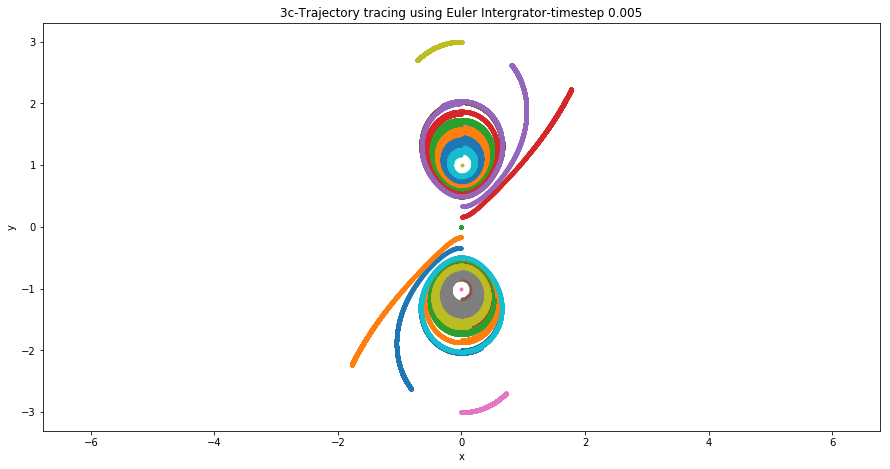

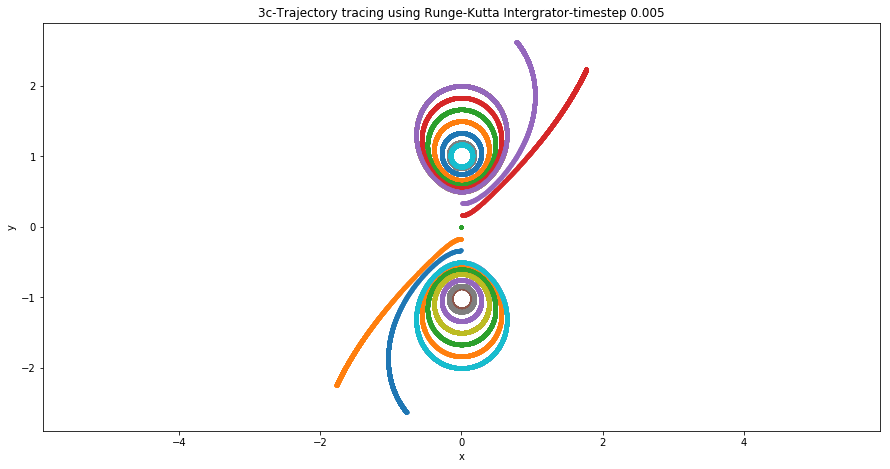

In [8]:
'''Problem-3c --3 vortices of equal strength'''
vor_z = np.asarray([complex(-1.0, 0), complex(1.0, 0), complex(0,-1.0), complex(0,1.0)])
gamma = np.asarray([-1*np.pi,-1*np.pi,1*np.pi,1*np.pi])
V= complex(0,0)
# dT=[0.2,0.1,0.06,0.03,0.009,0.006,0.001]
# for i in range(len(dT)):
    
dt = 0.005
tf = 10
a= vor_z.copy()
b= vor_z.copy()

z=create_tracers(x_low=0.0, x_up=0.0, y_low=-2.0, y_up = 2.0, n=25)


result_eul = euler_integrate(z.copy(), a,gamma, V,  dt, tf,sv_flag=0)
result_rk2 = rk2_integrate(z.copy(), b,gamma, V,  dt, tf,sv_flag=0)

# actual(a,a,gamma,V,dt,tf,sv_flag)


'''Plotting for result for problem-3c'''
plt.figure(figsize=(15,4.0/8.0*15))
plt.axis('equal')
plt.plot(result_eul.real,result_eul.imag,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.title("3c-Trajectory tracing using Euler Intergrator-timestep %s"%dt)
plt.figure(figsize=(15,4.0/8.0*15))
plt.axis('equal')
plt.plot(result_rk2.real,result_rk2.imag,'.')
plt.xlabel('x')
plt.ylabel('y')
plt.title("3c-Trajectory tracing using Runge-Kutta Intergrator-timestep %s"%dt)
